<a href="https://colab.research.google.com/github/DarylUnix/Data-Related-Learnings-and-Projects/blob/main/grocery_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1> Grocery Sales Prediction </h1>**

**<h2> Dataset Description </h2>**

This dataset provides a rich resource for researchers and practitioners interested in retail sales prediction and analysis. It contains information about various grocery products, the outlets where they are sold, and their historical sales data.

**Product Characteristics:**

*   Item_Identifier: Unique identifier for each product.
*   Item_Weight: Weight of the product item.
*   Item_Fat_Content: Categorical variable indicating the fat content of the product (e.g., low fat, regular).
*   Item_Visibility: Numerical attribute reflecting the visibility of the product in the store (likely a promotional measure).
*   Item_Type: Category of the product (e.g., Snacks, Beverages, Bakery).
*   Item_MRP: Maximum Retail Price of the product.


**Outlet Information:**

*   Outlet_Identifier: Unique identifier for each outlet (store).
*   Outlet_Establishment_Year: Year the outlet was established.
*   Outlet_Size: Categorical variable indicating the size of the outlet (e.g., Small, Medium, Large). (Note: This data may have missing values)
*   Outlet_Location_Type: Categorical variable indicating the type of location the outlet is in (e.g., Tier 1 City, Tier 2 City, Upstate).
*   Outlet_Type: Categorical variable indicating the type of outlet (e.g., Supermarket, Grocery Store, Convenience Store).

**Sales Data:**

*   Item_Outlet_Sales: The historical sales data for each product-outlet combination.
*   Profit: The profit margin earned on each product sold.
Potential Uses

https://www.kaggle.com/datasets/sushantchougule/kolkata-shops-sales

**<h2> Step 1 : Preparation of Data </h2>**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv("/content/drive/MyDrive/GrocerySales.csv", low_memory=False)
df

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


**<h2> Step 2: Cleaning </h2>**

In [ ]:
check = df.isnull().sum()
print("Missing values found? F/N: ", check.all())

Missing values found? F/N:  False


In [ ]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
7927,FDT59,13.650,Low Fat,0.000000,Breads,229.5,OUT049,1999,Medium,Tier 2,Supermarket Type1,4837.7028,14.5
5384,FDR52,12.650,Regular,0.076030,Frozen Foods,189.1,OUT035,2004,Small,Tier1,Supermarket Type1,4012.7766,14.6
3795,FDG09,20.600,Regular,0.080236,Fruits and Vegetables,189.0,OUT010,1998,Medium,Tier 2,Grocery Store,563.2668,14.4
3654,FDZ08,12.500,Regular,0.110215,Fruits and Vegetables,81.9,OUT045,2002,Medium,Tier 2,Supermarket Type1,1238.3880,14.0
1254,FDG47,12.800,Low Fat,0.069619,Starchy Foods,260.3,OUT046,1997,Small,Tier1,Supermarket Type1,8132.0812,14.5
3032,FDR55,12.150,Regular,0.131974,Fruits and Vegetables,188.0,OUT013,1987,High,Tier 3,Supermarket Type1,2458.1336,13.6
59,FDI26,0.000,Low Fat,0.061082,Canned,180.0,OUT019,1985,Small,Tier1,Grocery Store,892.1720,14.7
4640,FDX35,5.035,Regular,0.080363,Breads,229.0,OUT017,2007,Medium,Tier 2,Supermarket Type1,4326.3684,9.8
7660,FDY40,15.500,Regular,0.085835,Frozen Foods,49.7,OUT046,1997,Small,Tier1,Supermarket Type1,788.3072,14.3
1387,NCV41,14.350,Low Fat,0.017039,Health and Hygiene,112.5,OUT046,1997,Small,Tier1,Supermarket Type1,1989.4104,11.6


**<h2> Step 3: Analysis </h2>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   418
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     2098
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Profit                        140
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.688100,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.599483,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,8.050000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.688100,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.000000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,100.000000,0.328391,266.900000,2009.000000,13086.964800,24.000000


**<h2> Step 4: Data Visualization </h2>**

**<h3> 1. Average Item Weight by Item Type </h3>**

Knowing the average weight of items by type helps in efficient inventory management. For instance, if certain types of items are heavier, it's important to ensure that storage spaces can accommodate them without overloading or causing logistical issues.

It also serves as guide product placement strategies in stores. Heavier items might be placed at lower shelves or closer to checkout counters for convenience.

In the bar chart below, it shows that the starchy foods is the heaviest while the bread is the breads are the lightest.

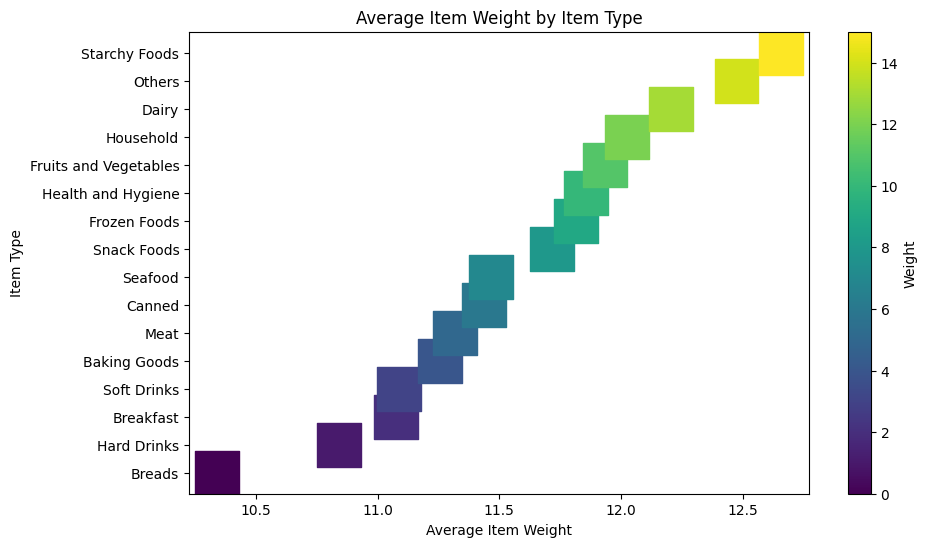

In [ ]:
avg_weight_by_type = df.groupby('Item_Type')['Item_Weight'].mean().sort_values()
colors = sns.color_palette('viridis', len(avg_weight_by_type))
plt.figure(figsize=(10, 6))
plt.scatter(avg_weight_by_type.values, avg_weight_by_type.index, s=1000, c=range(len(avg_weight_by_type)), cmap='viridis', marker='s')
plt.colorbar(label='Weight')
plt.title('Average Item Weight by Item Type')
plt.xlabel('Average Item Weight')
plt.ylabel('Item Type')
plt.show()

**<h3> 2. Average Sales by Outlet Type: </h3>**

Understanding the average sales by outlet type is crucial for strategic planning and resource allocation. It helps identify which types of outlets are performing well and where to focus marketing and operational efforts for maximum impact.

In the graphs below, it shows that the Supermarket Type 3 has the most average sales while the grocery store has the lowest.

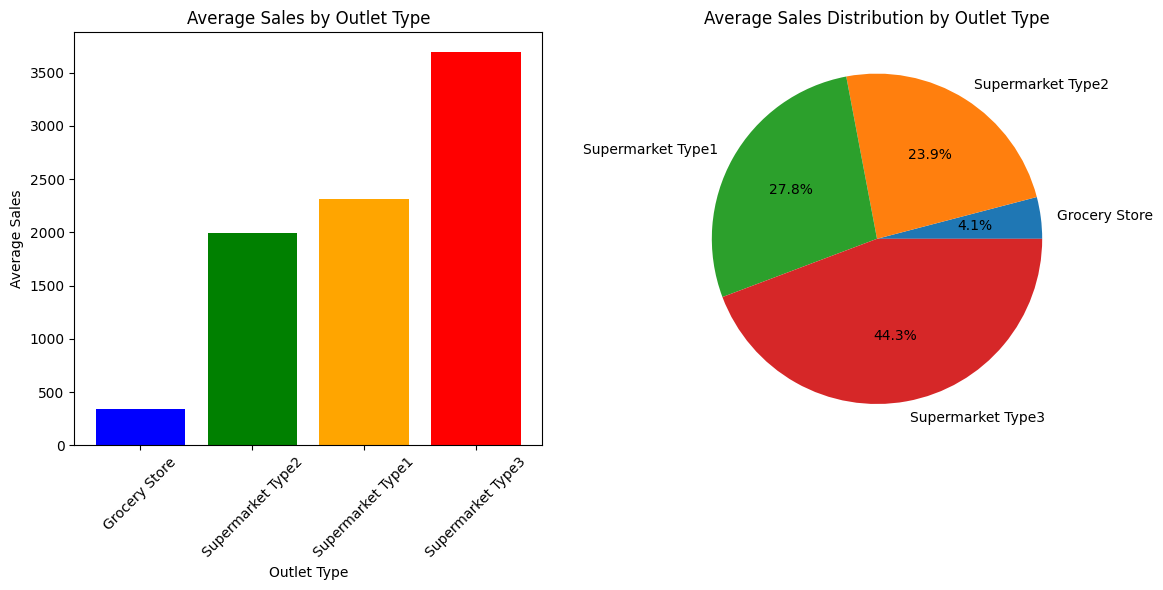

In [ ]:
average_sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values()
colors = {'Supermarket Type3': 'red', 'Supermarket Type2': 'green',
          'Supermarket Type1': 'orange', 'Grocery Store': 'blue'}
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(average_sales_by_outlet_type.index, average_sales_by_outlet_type, color=[colors.get(x, '#cccccc') for x in average_sales_by_outlet_type.index])
axs[0].set_title('Average Sales by Outlet Type')
axs[0].set_xlabel('Outlet Type')
axs[0].set_ylabel('Average Sales')
axs[0].tick_params(axis='x', rotation=45)
axs[1].pie(average_sales_by_outlet_type, labels=average_sales_by_outlet_type.index, autopct='%1.1f%%')
axs[1].set_title('Average Sales Distribution by Outlet Type')
plt.tight_layout()
plt.show()

**<h3> 3. Item Type Sales Distribution </h3>**

This is crucial for informed decision-making related to product assortment, pricing, promotions, and inventory management strategies, ultimately contributing to improved sales performance and customer satisfaction

In the bar chart below, it shows that fruits and vegetables, snacks, and household items are the top 3 best sellers, while seafood and breakfast are top 2 bottom placers.

<ipython-input-38-e35d60000221>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_type_sales_distribution.values, y=item_type_sales_distribution.index, palette=colors)
<ipython-input-38-e35d60000221>:4: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=item_type_sales_distribution.values, y=item_type_sales_distribution.index, palette=colors)


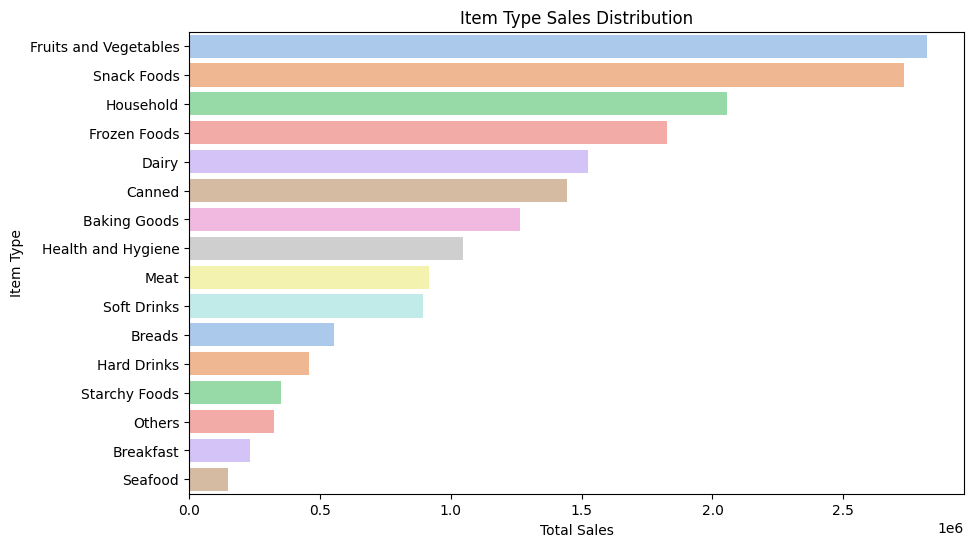

In [ ]:
item_type_sales_distribution = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6))
sns.barplot(x=item_type_sales_distribution.values, y=item_type_sales_distribution.index, palette=colors)
plt.title('Item Type Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.show()

**<h3> 4. Outlet Size vs. Sales </h3>**

Outlet size directly impacts operational costs and profitability. Larger outlets may incur higher overheads but have the potential for greater sales volumes, while smaller outlets may have lower operating costs but limited sales capacity. This insight aids in assessing the profitability of different outlet sizes and optimizing cost-effective strategies for each category.

In the donut chart below, medium sizes outlet are having the most impact when it comes to sales. It just proves that the sales do not direclty reflect on the size of the outlet.

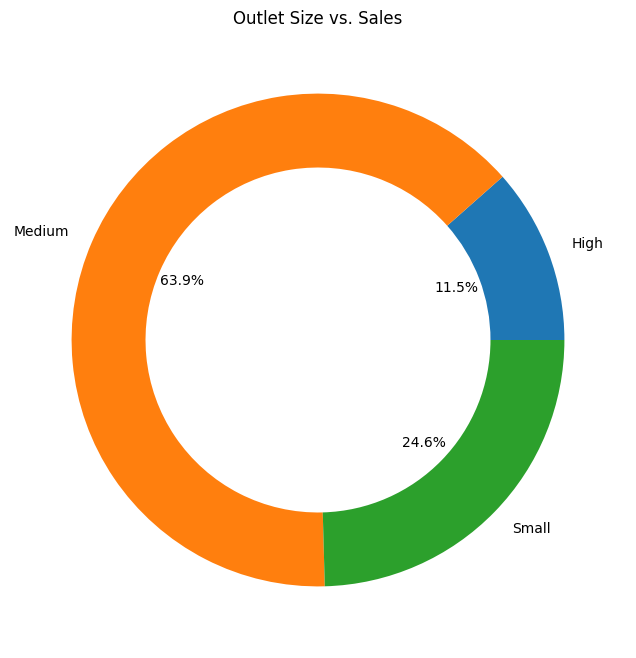

In [ ]:
outlet_size_vs_sales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(outlet_size_vs_sales, labels=outlet_size_vs_sales.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Outlet Size vs. Sales')
plt.show()

**<h3> 5. Establishment Year vs. Sales </h3>**

This insight analyzes the relationship between the establishment year of outlets and their sales performance. It examines whether outlets established in different years experience varying sales figures and trends over time. This insight can reveal patterns such as whether newer outlets have higher sales growth rates, how sales evolve for older outlets, and if there are any correlations between establishment year and sales fluctuations.

In the line graph below, if you follow the line you could see the trend of the sales every year, and you can easily indentify the year when the sales dipped, and how it progresses along the way. This makes it easy to track the progress of the establishment's sales yearly.

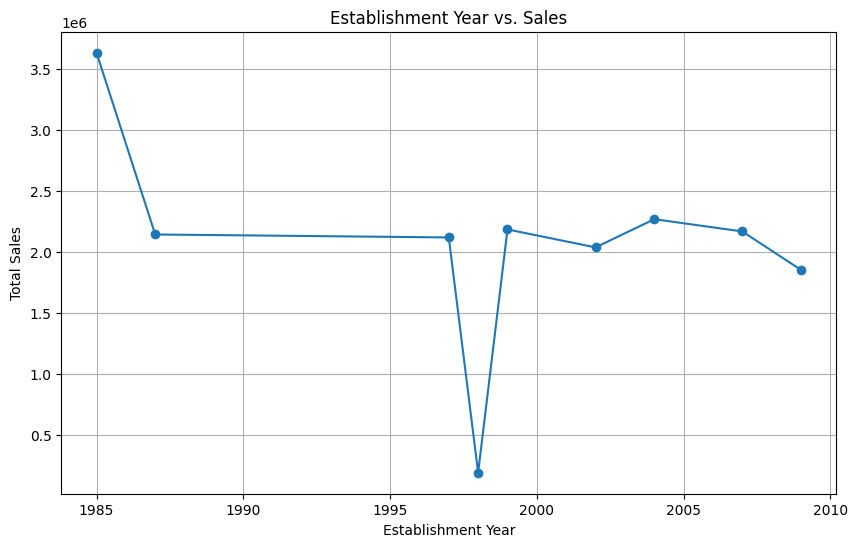

In [ ]:
establishment_year_vs_sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(establishment_year_vs_sales.index, establishment_year_vs_sales.values, marker='o')
plt.title('Establishment Year vs. Sales')
plt.xlabel('Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()